In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve, auc, ConfusionMatrixDisplay,
     roc_curve, RocCurveDisplay,f1_score
)
from sklearn import metrics
import matplotlib.pyplot as plt

import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler


In [19]:
data = pd.read_csv('data/lending_club_loan_two.csv', error_bad_lines=False)

/var/folders/bj/1bm8_9hj23n5wy8n37g6dj_w0000gp/T/ipykernel_43315/307238160.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('data/lending_club_loan_two.csv', error_bad_lines=False)


In [20]:
def pub_rec(number):
    if number == 0.0:
        return 0
    else:
        return 1

def mort_acc(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number

def pub_rec_bankruptcies(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number


data['pub_rec'] = data.pub_rec.apply(pub_rec)
data['mort_acc'] = data.mort_acc.apply(mort_acc)
data['pub_rec_bankruptcies'] = data.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)
data['loan_status'] = data.loan_status.map({'Fully Paid':1, 'Charged Off':0})

In [21]:
data.emp_title.nunique()
data.drop('emp_title', axis=1, inplace=True)
data.drop('emp_length', axis=1, inplace=True)
data.drop('title', axis=1, inplace=True)
data.drop('grade', axis=1, inplace=True)

In [22]:
data.dropna(inplace=True)
term_values = {' 36 months': 36, ' 60 months': 60}
data['term'] = data.term.map(term_values)

In [23]:
dummies = ['sub_grade', 'verification_status', 'purpose', 'initial_list_status',
           'application_type', 'home_ownership']
data = pd.get_dummies(data, columns=dummies, drop_first=True)
data['zip_code'] = data.address.apply(lambda x: x[-5:])

In [24]:
data = pd.get_dummies(data, columns=['zip_code'], drop_first=True)
data.drop('address', axis=1, inplace=True)
data.drop('issue_d', axis=1, inplace=True)

In [25]:
data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'])
data['earliest_cr_line'] = data.earliest_cr_line.dt.year

In [26]:
train, test = train_test_split(data, test_size=0.2, random_state=42)
X_train, y_train = train.drop('loan_status', axis=1), train.loan_status
X_test, y_test = test.drop('loan_status', axis=1), test.loan_status

In [27]:
scaler = MinMaxScaler()
X_train = scaler.fit(X_train)
X_test = scaler.transform(X_test)

In [28]:
def print_score(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")

## Pycaret

In [29]:
pip install pycaret

  Obtaining dependency information for pycaret from https://files.pythonhosted.org/packages/f5/4b/2002980b046ac396618dfc152d384b812a78182b776ca77fe0ae5f80deac/pycaret-3.0.4-py3-none-any.whl.metadata
  Using cached pycaret-3.0.4-py3-none-any.whl.metadata (17 kB)
  Obtaining dependency information for ipywidgets>=7.6.5 from https://files.pythonhosted.org/packages/b8/d4/ce436660098b2f456e2b8fdf76d4f33cbc3766c874c4aa2f772c7a5e943f/ipywidgets-8.1.0-py3-none-any.whl.metadata
  Using cached ipywidgets-8.1.0-py3-none-any.whl.metadata (2.4 kB)
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pyod-1.1.0.tar.gz (153 kB)
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for imbalanced-learn>=0.8.1 from https://files.pythonhosted.org/packages/a

In [ ]:
from pycaret.classification import *

In [ ]:
s = ClassificationExperiment()
s = setup(data, target = 'loan_status', session_id = 123)

In [ ]:
best = s.compare_models()

In [ ]:
s.evaluate_model(best)

In [ ]:
evaluate_model(best)

In [ ]:
def print_score(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

## LIGHTGBM

In [15]:
# Convert the data to LightGBM format
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

# Set the model parameters
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 31,
    'learning_rate': 0.05,
}

# Train the model
model = lgb.train(params, train_data, num_boost_round=100)

y_pred = np.round(model.predict(X_test))


[LightGBM] [Info] Number of positive: 228913, number of negative: 57498
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029921 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2051
[LightGBM] [Info] Number of data points in the train set: 286411, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.799247 -> initscore=1.381592
[LightGBM] [Info] Start training from score 1.381592


In [16]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8858


[[ 6650  7930]
 [  247 56776]]


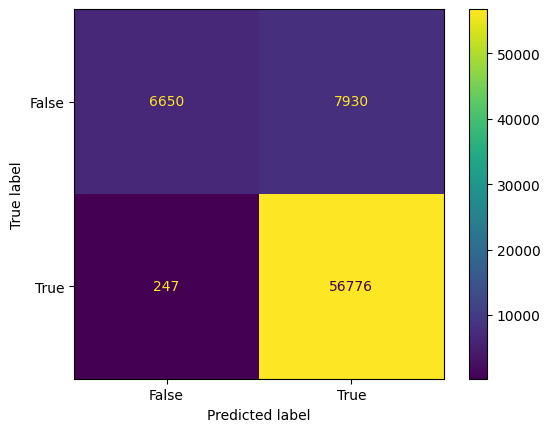

In [17]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [18]:
f1_score(y_test, y_pred, average='weighted')

0.8689784341627734

In [24]:
print_score(y_test, y_pred, train=True)

Train Result:
Accuracy Score: 88.58%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.964187      0.877446  0.885801      0.920817      0.895108
recall         0.456104      0.995668  0.885801      0.725886      0.885801
f1-score       0.619267      0.932826  0.885801      0.776047      0.868978
support    14580.000000  57023.000000  0.885801  71603.000000  71603.000000


##Random Forest

In [15]:
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

y_test_pred = rf_clf.predict(X_test)

print_score(y_test, y_test_pred, train=False)

TypeError: float() argument must be a string or a real number, not 'MinMaxScaler'

[[10907 13038]
 [  508 93692]]


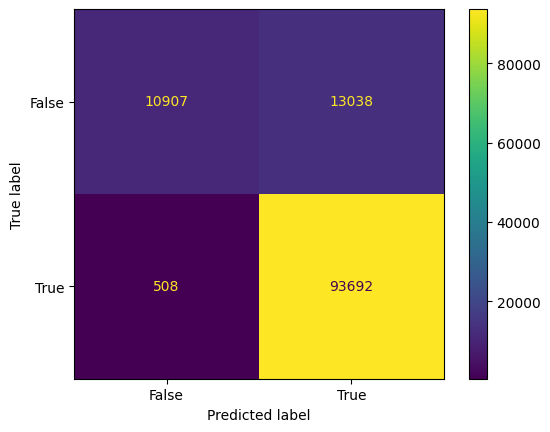

In [ ]:
confusion_matrix1 = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion_matrix1)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix1, display_labels = [False, True])
cm_display.plot()
plt.show()